In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [15]:
file_path = 'retail.csv'
data = pd.read_csv(file_path)

In [9]:
required_columns = ['total_spent', 'num_transactions', 'avg_transaction_value']
if not all(column in data.columns for column in required_columns):
    raise ValueError(f"The CSV file must contain columns: {required_columns}")


features = data[required_columns]


In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)




In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)




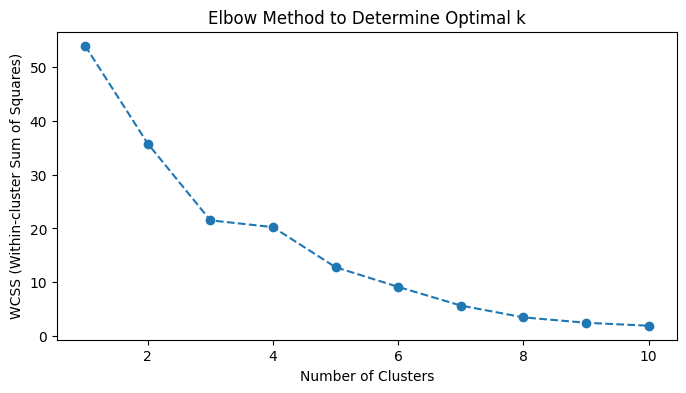

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()




In [12]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

print("Cluster centers:")
print(kmeans.cluster_centers_)
print("\nData with cluster labels:")
print(data.head())




Cluster centers:
[[ 0.96976348 -0.78997199  1.44597075]
 [ 0.03097499  1.44452021  0.01071774]
 [-0.44821432 -0.45141257 -0.64860797]]

Data with cluster labels:
   total_spent  num_transactions  avg_transaction_value  cluster
0          500                10                     50        2
1         1500                20                     75        0
2          200                40                     40        2
3         1000                25                     40        2
4          300                35                     20        2


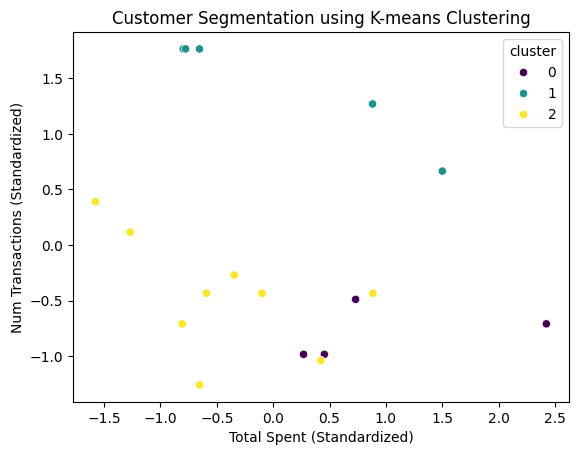

In [14]:
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['cluster'], palette='viridis')
plt.xlabel('Total Spent (Standardized)')
plt.ylabel('Num Transactions (Standardized)')
plt.title('Customer Segmentation using K-means Clustering')
plt.show()
